# Try with only important features

### Read Data Set

In [109]:
import pandas as pd
import numpy as np

data_metaboloma_transpose = pd.read_excel("../DataSet PAscale/Metaboloma.xlsx")
data_metaboloma_transpose

data_metaboloma = data_metaboloma_transpose.T

data_metaboloma.columns = data_metaboloma_transpose["Sample"]

data_metaboloma = data_metaboloma.iloc[1:]

data_metaboloma.columns = list(data_metaboloma.columns)

df_y_metaboloma = data_metaboloma["Label"].iloc[1:]

mz_metaboloma = data_metaboloma.iloc[0:1,1:]

df_y_qc_metaboloma = data_metaboloma["Label"].iloc[1:5]

df_x_metaboloma = data_metaboloma.iloc[1:,1:]

df_qc_metaboloma = data_metaboloma.iloc[1:5]

name_samples_metaboloma = df_x_metaboloma.transpose().columns

df_x_metaboloma

,Aminooctanoic acid,Androsterone sulfate,Arachidonic acid,Arginine,Asymmetric dimethylarginine,Bilirubin,Biliverdin,CAR 10:0,CAR 10:1,CAR 14:1,...,Paraxanthine,Phenylacetylglutamine,Pregnenolone sulfate,Proline betaine,Proline-hydroxyproline,Pseudouridine,Sphingosine 1-phosphate,Taurine,Tyrosine,Urobilinogen
260522_QC 3uL POS_BA2_1_5281,1724.36,36169.2,1791.64,20815.31,18192.06,2352.46,3163.69,41893.68,20112.96,13712.3,...,25095.15,11855.6,7784.79,63059.26,4441.94,2532.3,370.53,4797.76,1558.59,10739.38
260522_QC 3uL POS_BA2_1_5282,2069.33,NaN,2686.61,18423.92,16191.01,2867.38,2492.91,45853.77,22089.3,13680.64,...,26118.44,12851.29,8463.23,59114.21,4312.64,2706.49,547.05,4898.68,2369.34,10762.16
260522_QC 3uL POS_BA2_1_5292,2345.91,36445.49,1934.77,18134.45,16500.87,2068.57,2921.83,40248.9,20480.08,14949.6,...,34265.84,16378.96,9249.89,58846.07,4322.24,2988.95,480.28,4262.75,1780.54,10415.68
260522_QC 3uL POS_BA2_1_5336,2800.96,48072.08,2338.6,NaN,18163.49,1626.92,2426.26,38664.73,19663.5,14294.55,...,32695.32,13010.66,11141.93,68917.94,4249.72,2369.77,604.94,3894.54,1470.27,8576.66
260522_LC 203_POS_BA3_1_5284,5593.8,8391.23,2555.37,23541.71,25006.24,20973.29,11433.02,101834.45,27948.15,20205.67,...,59383.52,24228.53,2319.81,11698.76,5601.15,2336.02,920.18,4491.4,3273.71,893.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260522_HC 019_POS_GE8_1_5367,5082.13,71447.89,2195.48,11581.65,11746.75,2378.9,1772.48,62455.74,40757.8,11739.01,...,95740.05,22130.71,10216.19,16960.19,4379.81,2054.49,1658.98,3282.69,1720.11,1485.28
260522_HC 020_POS_RA1_1_5368,2560.8,6213.98,2240.19,19817.97,15440.64,3008.33,2334.52,119343.25,55534.63,24819.22,...,43309.66,27068.33,5982.11,8025.66,7901.4,3315.97,981.54,2643.4,2377.65,2736.38
260522_HC 021_POS_RA7_1_5375,4378.68,NaN,826.61,7058.17,14720.29,5098.76,3060.99,160972.44,40101.87,12816.22,...,31221.78,27424.89,3857.13,74973.58,4896.98,3970.25,766.7,3415.74,2796.12,8934.25
260522_HC 022_POS_RA8_1_5376,3584.63,106970.46,2322.56,16072.35,15300.35,8262.55,4217.25,75388.84,25210.08,13802.58,...,99036.48,16814.4,10656.49,45065.14,2711.33,2925.63,587.06,4154.92,1176.92,3078.14


Delete the features less important

In [110]:
most_important_features = (pd.read_excel("most_important_features.xlsx")).drop(columns="Unnamed: 0")

df_x_metaboloma = df_x_metaboloma[most_important_features["Features"]]

mz_metaboloma = mz_metaboloma[most_important_features["Features"]]
mz_metaboloma

,CAR 10:0,CAR 8:0,CAR 10:1,CAR 6:0,Arachidonic acid,Methylpyridonecarboxamide,Biliverdin,Glycerophosphocholine,FA 18:1+1O,Hydroxyanthranilic acid,Indoxyl sulfate,Deoxycholic acid glycine conjugate,Aminooctanoic acid,Taurine
m/z measured,316.24831,288.21724,314.23275,260.18546,303.23318,153.06585,583.25559,258.11014,295.22836,154.05006,212.00253,448.30692,160.13322,124.00733


In [111]:
num_features = len(mz_metaboloma.columns)
num_features

14

In [112]:
# color mapping to use in plot
color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange',
    'QC' : 'purple'
}

colors = [color_mapping[label] for label in df_y_metaboloma]

### View the data

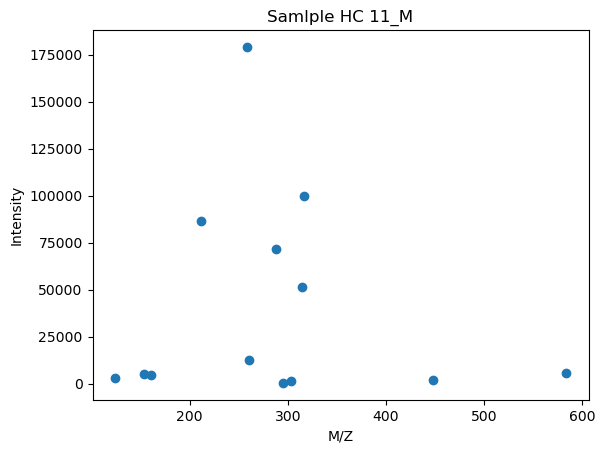

260522_HC 07_POS_BD8_1_5315    179077.94
dtype: object


In [113]:
import matplotlib.pyplot as plt

plt.scatter(mz_metaboloma, df_x_metaboloma.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
print(df_x_metaboloma[89:90].max(axis=1))


In [114]:
df_x_metaboloma_original = df_x_metaboloma.copy()
for column in df_x_metaboloma.columns:
    df_x_metaboloma.loc[:,column] = df_x_metaboloma[column].fillna((np.nanmin(df_x_metaboloma[column]))/5)
print(df_x_metaboloma.isna().sum().sort_values(ascending=False))

CAR 10:0                              0
CAR 8:0                               0
CAR 10:1                              0
CAR 6:0                               0
Arachidonic acid                      0
Methylpyridonecarboxamide             0
Biliverdin                            0
Glycerophosphocholine                 0
FA 18:1+1O                            0
Hydroxyanthranilic acid               0
Indoxyl sulfate                       0
Deoxycholic acid glycine conjugate    0
Aminooctanoic acid                    0
Taurine                               0
dtype: int64


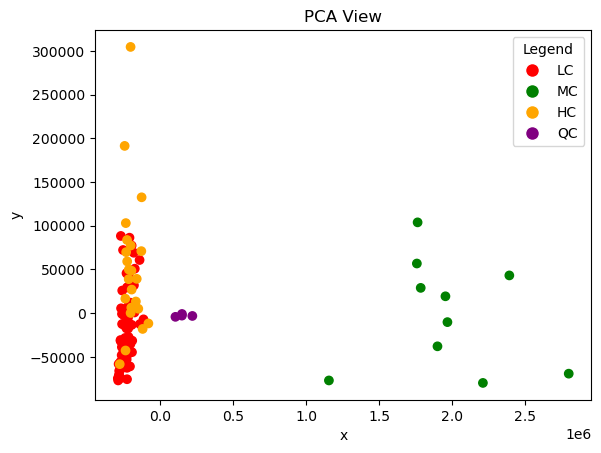

In [115]:
from sklearn.decomposition import PCA
pca_view = PCA(n_components=2)

scores_view = pca_view.fit_transform(df_x_metaboloma,df_y_metaboloma)


plt.scatter(scores_view[:, 0], scores_view[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()



### TIC Normalization

Hydroxyanthranilic acid               19
Deoxycholic acid glycine conjugate    15
Taurine                               15
Arachidonic acid                      11
FA 18:1+1O                             9
Aminooctanoic acid                     9
Biliverdin                             7
CAR 6:0                                2
CAR 8:0                                1
CAR 10:1                               1
Methylpyridonecarboxamide              1
Indoxyl sulfate                        1
CAR 10:0                               0
Glycerophosphocholine                  0
dtype: int64


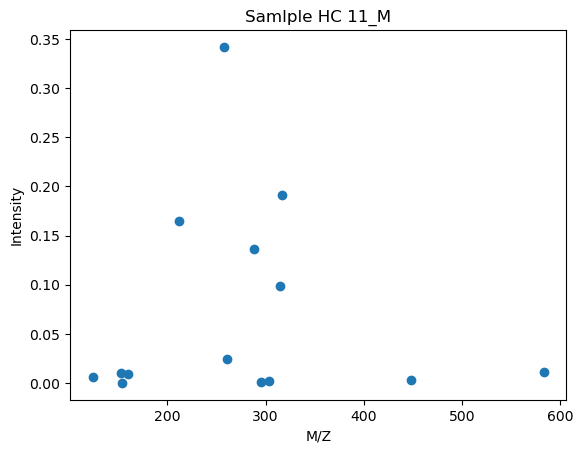

260522_HC 07_POS_BD8_1_5315    0.341877
dtype: object

In [116]:
print(df_x_metaboloma_original.isna().sum().sort_values(ascending=False))

tic = df_x_metaboloma_original.sum(axis=1, skipna=True)
df_x_metaboloma_tic = df_x_metaboloma.div(tic,axis=0)

plt.scatter(mz_metaboloma, df_x_metaboloma_tic.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_metaboloma_tic[89:90].max(axis=1)

#### View after normalization

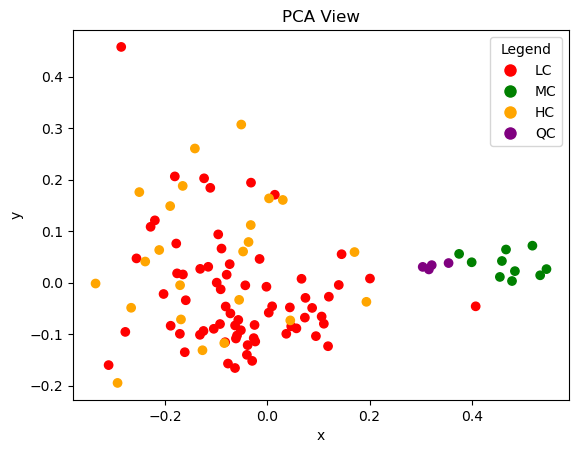

In [117]:
pca_view = PCA(n_components=2)

scores_view = pca_view.fit_transform(df_x_metaboloma_tic,df_y_metaboloma)


plt.scatter(scores_view[:, 0], scores_view[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

#### Drop outlier

In [118]:
drop = []

LC

In [119]:
## codice prova con la distanza di mahalonobis
lc = scores_view[4:73,:]

mean_lc = np.mean(lc,axis=0)
cov_matrix = np.cov(lc,rowvar=False)

mahalanobis_distance_lc = []

for point in lc:
    diff = point - mean_lc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_lc.append(distance)
    
# print(mahalanobis_distance_lc)

outlier_lc = pd.DataFrame({"Sample":df_x_metaboloma_tic.index[4:73],"outlier":mahalanobis_distance_lc}).sort_values(by="outlier",ascending=False)
outlier_lc

,Sample,outlier
60,260522_LC 431_POS_RB8_1_5384,4.504823
67,260522_LC 443_POS_RC7_1_5391,3.733025
5,260522_LC 242_POS_BB3_1_5293,2.732048
18,260522_LC 321_POS_BD6_1_5313,2.179465
28,260522_LC 350_POS_GA6_1_5330,2.165944
...,...,...
59,260522_LC 429_POS_RB7_1_5383,0.393729
52,260522_LC 408_POS_RA5_1_5373,0.378527
2,260522_LC 235b_POS_BA5_1_5286,0.361966
10,260522_LC 299_POS_BC3_1_5302,0.311112


In [120]:
from scipy.stats import chi2

alpha = 0.05
threshold_distance_mahalanobis = chi2.ppf(1 - alpha, df = 2)
threshold_distance_mahalanobis

5.991464547107979

In [121]:
mean_out_lc = outlier_lc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_lc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)

outlier_lc = outlier_lc.drop(outlier_lc[outlier_lc["Sample"].isin(temp)].index)

drop

['260522_LC 431_POS_RB8_1_5384', '260522_LC 443_POS_RC7_1_5391']

MC

In [122]:
mc = scores_view[73:83,:]

mean_mc = np.mean(mc,axis=0)
cov_matrix = np.cov(mc,rowvar=False)

mahalanobis_distance_mc = []

for point in mc:
    diff = point - mean_mc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_mc.append(distance)

outlier_mc = pd.DataFrame({"Sample":df_x_metaboloma_tic.index[73:83],"outlier":mahalanobis_distance_mc}).sort_values(by="outlier",ascending=False)
outlier_mc

,Sample,outlier
9,260522_MC 18_POS_GE7_1_5366,2.013808
2,260522_MC 09_POS_BC7_1_5306,1.832923
7,260522_MC 15_POS_GC7_1_5349,1.373815
0,260522_MC 04_POS_BA7_1_5288,1.365276
5,260522_MC 13_POS_GA7_1_5331,1.326112
1,260522_MC 05_POS_BB7_1_5298,1.301064
6,260522_MC 14_POS_GB7_1_5341,1.263731
3,260522_MC 10_POS_BD7_1_5314,1.168428
4,260522_MC 11_POS_BE7_1_5323,0.551256
8,260522_MC 17_POS_GD7_1_5358,0.340823


In [123]:
mean_out_mc = outlier_mc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_mc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)
        
outlier_mc = outlier_mc.drop(outlier_mc[outlier_mc["Sample"].isin(temp)].index)

drop

['260522_LC 431_POS_RB8_1_5384', '260522_LC 443_POS_RC7_1_5391']

HC

In [124]:
hc = scores_view[83:106,:]

mean_hc = np.mean(hc,axis=0)
cov_matrix = np.cov(hc,rowvar=False)

mahalanobis_distance_hc = []

for point in hc:
    diff = point - mean_hc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_hc.append(distance)

outlier_hc = pd.DataFrame({"Sample":df_x_metaboloma_tic.index[83:106],"outlier":mahalanobis_distance_hc}).sort_values(by="outlier",ascending=False)
outlier_hc

,Sample,outlier
1,260522_HC 02_POS_BB1_1_5290,2.342811
5,260522_HC 06_POS_BD1_1_5308,2.203768
11,260522_HC 012_POS_GB1_1_5333,2.014954
2,260522_HC 03_POS_BB8_1_5299,1.994696
7,260522_HC 08_POS_BE1_1_5316,1.708631
20,260522_HC 021_POS_RA7_1_5375,1.674579
9,260522_HC 010_POS_GA1_1_5325,1.530458
4,260522_HC 05_POS_BC8_1_5307,1.523957
3,260522_HC 04_POS_BC1_1_5300,1.390476
19,260522_HC 020_POS_RA1_1_5368,1.317440


In [125]:
mean_out_hc = outlier_hc["outlier"].mean(axis=0)

temp = []
for sample,elem in outlier_hc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)

outlier_hc = outlier_hc.drop(outlier_hc[outlier_hc["Sample"].isin(temp)].index) 
drop

['260522_LC 431_POS_RB8_1_5384', '260522_LC 443_POS_RC7_1_5391']

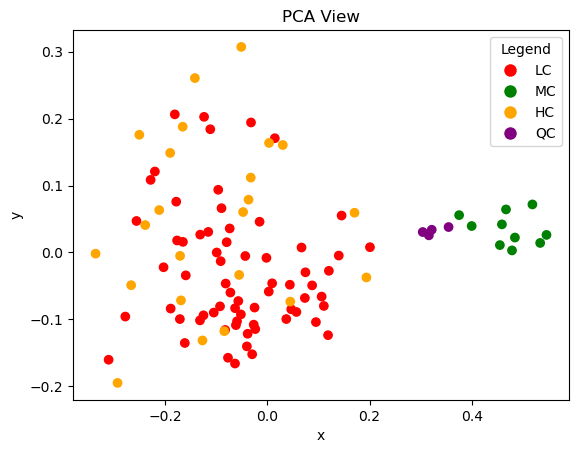

In [126]:
df_score_view = pd.DataFrame({"Sample":df_x_metaboloma_tic.index,"Score View X":scores_view[:,0], "Score View Y":scores_view[:,1]})

index_drop = df_score_view[df_score_view["Sample"].isin(drop)].index
colors_after_drop = np.delete(colors,index_drop)
df_score_view = df_score_view.drop(index_drop)
df_score_view

plt.scatter(df_score_view["Score View X"], df_score_view["Score View Y"], c=colors_after_drop)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

### Split in Train and in Test

Choose the train and the test

Label
LC    69
HC    23
MC    10
Name: count, dtype: int64
Label
LC    67
HC    23
MC    10
Name: count, dtype: int64


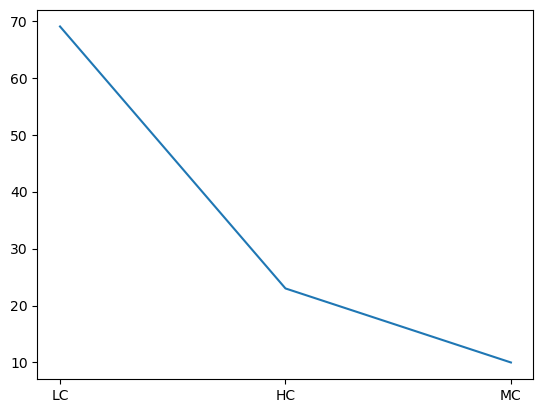

In [127]:
df_x_metaboloma_tic_noqc = df_x_metaboloma_tic.iloc[4:]
df_y_metaboloma_noqc = df_y_metaboloma.iloc[4:]

print(df_y_metaboloma_noqc.value_counts())

x_tic = df_x_metaboloma_tic_noqc.copy()
y_tic = df_y_metaboloma_noqc.copy()

x_tic = x_tic.drop(drop)
y_tic = y_tic.drop(drop)
print(y_tic.value_counts())
plt.plot(df_y_metaboloma_noqc.value_counts())
plt.show()

Split the data set in train and in test set

In [128]:
train_size = 0.7

train_size_lc = int(len(outlier_lc)*train_size)
train_size_mc = int(len(outlier_mc)*train_size)
train_size_hc = int(len(outlier_hc)*train_size)

list_train_lc_x = x_tic.loc[outlier_lc["Sample"].iloc[0:train_size_lc]]
list_train_lc_y = y_tic.loc[outlier_lc["Sample"].iloc[0:train_size_lc]]

list_train_mc_x = x_tic.loc[outlier_mc["Sample"].iloc[0:train_size_mc]]
list_train_mc_y = y_tic.loc[outlier_mc["Sample"].iloc[0:train_size_mc]]

list_train_hc_x = x_tic.loc[outlier_hc["Sample"].iloc[0:train_size_hc]]
list_train_hc_y = y_tic.loc[outlier_hc["Sample"].iloc[0:train_size_hc]]

x_train_tic = pd.concat([list_train_lc_x,list_train_mc_x,list_train_hc_x])
y_train_tic = pd.concat([list_train_lc_y,list_train_mc_y,list_train_hc_y])
y_train_tic

260522_LC 242_POS_BB3_1_5293    LC
260522_LC 321_POS_BD6_1_5313    LC
260522_LC 350_POS_GA6_1_5330    LC
260522_LC 241_POS_BB2_1_5291    LC
260522_LC 435_POS_RC2_1_5386    LC
                                ..
260522_HC 013_POS_GB8_1_5342    HC
260522_HC 09_POS_BE8_1_5324     HC
260522_HC 023_POS_RB1_1_5377    HC
260522_HC 019_POS_GE8_1_5367    HC
260522_HC 016_POS_GD1_1_5351    HC
Name: Label, Length: 69, dtype: object

In [129]:
x_test_tic = x_tic.loc[~x_tic.isin(x_train_tic.to_dict(orient='list')).all(axis=1)]
y_test_tic = y_tic[~y_tic.index.isin(y_train_tic.index)]
len(y_test_tic)

31

In [130]:
name_sample_train_tic = x_train_tic.transpose().columns
name_sample_test_tic = x_test_tic.transpose().columns

#### Save the mean and standard deviation of the training set

In [131]:
mean_tic= x_train_tic.mean(axis=0)
std_tic = x_train_tic.std(axis=0)

### Without PCA

Compose Models

In [132]:
X_w_tic = x_train_tic
Y_w_tic = y_train_tic
x_test_tic_centered = (x_test_tic.sub(mean_tic,axis=1)).div(std_tic,axis=1)

all_performance = []

##### Logistic Regression

In [133]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from imblearn.over_sampling import BorderlineSMOTE

loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0
# Itera attraverso i fold
for train_index, val_index in loo.split(X_w_tic,Y_w_tic):
    i+=1
    
    train_x_temp, test_x_temp = X_w_tic.iloc[train_index],X_w_tic.iloc[val_index]
    train_y_temp, test_y_temp = Y_w_tic.iloc[train_index],Y_w_tic.iloc[val_index]
    
    #ribilanciamento
    bls = BorderlineSMOTE(random_state=99)
    train_x_temp,train_y_temp = bls.fit_resample(train_x_temp,train_y_temp)

    # normalizzazione
    mean_tic_temp= train_x_temp.mean(axis=0)
    std_tic_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_tic_temp,axis=1)).div(std_tic_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_tic_temp,axis=1)).div(std_tic_temp,axis=1)
    
    lm = LogisticRegression(penalty='l2', C=0.9, class_weight='balanced', multi_class='auto',max_iter=10000, n_jobs=4, solver='saga') # penalty{‘l1’, ‘l2’, ‘elasticnet’, None}; multi_class{‘auto’, ‘ovr’, ‘multinomial’}
    
    lm.fit(train_x_temp, train_y_temp)
    
    predicted_y_temp = lm.predict(test_x_temp)

    # Calcola e memorizza la misura delle prestazioni (es. accuratezza)
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp.values,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp.values,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp)

all_performance = [{"TIC-SUM":{
    "LogisticRegression_Validation": {
        "BorderlineSMOTE": mean_accuracy_balanced_temp
    }
}}]

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


L'accuracy è:  97.10144927536231 
La balanced_accuracy è:  97.10144927536231


Try on test

In [134]:
predicted_y_test = lm.predict(x_test_tic_centered)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test_tic,predicted_y_test)*100,2)
all_performance[0]["TIC-SUM"]["LogisticRegression_Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

95.24

Show the error in Logistic Regression

Gli errori vengono commessi sul campione:  [11 12 21]


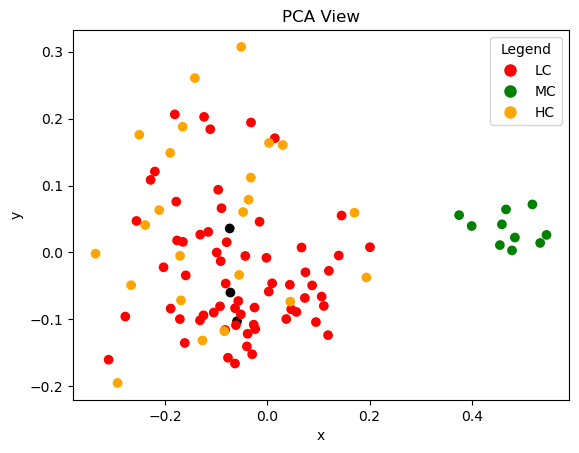

In [135]:
show_error_lr = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test_tic})
errors_name = show_error_lr[show_error_lr["Predict"] != show_error_lr["Real"]].index
errors_name

df_score_view_noqc = df_score_view.drop([0,1,2,3])

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 4
print("Gli errori vengono commessi sul campione: ",error_index.values)
colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3])
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

##### SVM

In [136]:
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn import metrics as mt
from imblearn.over_sampling import BorderlineSMOTE

loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0
# Itera attraverso i fold
for train_index, val_index in loo.split(X_w_tic):
    i+=1
    train_x_temp, test_x_temp = X_w_tic.iloc[train_index],X_w_tic.iloc[val_index]
    train_y_temp, test_y_temp = Y_w_tic.iloc[train_index],Y_w_tic.iloc[val_index]
    
    # balancing
    train_x_temp,train_y_temp = BorderlineSMOTE(random_state=99).fit_resample(train_x_temp,train_y_temp)
    
    # normalization
    mean_tic_temp= train_x_temp.mean(axis=0)
    std_tic_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_tic_temp,axis=1)).div(std_tic_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_tic_temp,axis=1)).div(std_tic_temp,axis=1)
    
    model_svc = SVC(C=0.9,kernel="linear")
    model_svc.fit(train_x_temp,train_y_temp)
    
    predicted_y_temp = model_svc.predict(test_x_temp)
    
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "%\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp,"%")

all_performance[0]["TIC-SUM"]["SVM_Validation"]= {"BorderlineSMOTE":mean_accuracy_balanced_temp}

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


L'accuracy è:  95.65217391304348 %
La balanced_accuracy è:  95.65217391304348 %


/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Try on Test

In [137]:
predicted_y_test = model_svc.predict(x_test_tic_centered)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test_tic,predicted_y_test)*100,2)
all_performance[0]["TIC-SUM"]["SVM_Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

96.83

Show the error in SVM

Gli errori vengono commessi sul campione:  [11 21]


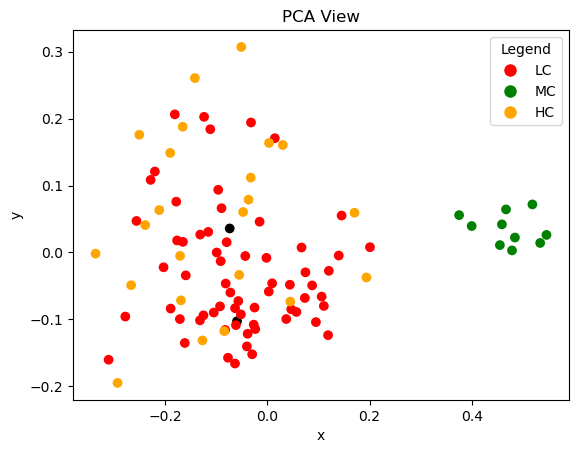

In [138]:
show_error_svm = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test_tic})
errors_name = show_error_svm[show_error_svm["Predict"] != show_error_svm["Real"]].index
errors_name

df_score_view_noqc = df_score_view.drop([0,1,2,3])

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 4
print("Gli errori vengono commessi sul campione: ",error_index.values)
colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3])
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

##### Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.model_selection import LeaveOneOut
from imblearn.over_sampling import BorderlineSMOTE

loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0

for train_index, val_index in loo.split(X_w_tic):
    i+=1
    train_x_temp, test_x_temp = X_w_tic.iloc[train_index],X_w_tic.iloc[val_index]
    train_y_temp, test_y_temp = Y_w_tic.iloc[train_index],Y_w_tic.iloc[val_index]
    
    train_x_temp,train_y_temp = BorderlineSMOTE(random_state=99).fit_resample(train_x_temp,train_y_temp)
    
    # normalizzazione
    mean_tic_temp = train_x_temp.mean(axis=0)
    std_tic_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_tic_temp,axis=1)).div(std_tic_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_tic_temp,axis=1)).div(std_tic_temp,axis=1)
    
    rf_model = RandomForestClassifier(n_estimators=200, random_state=3, max_depth=22, n_jobs=4)
    rf_model.fit(train_x_temp, train_y_temp)
    predicted_y_temp = rf_model.predict(test_x_temp)
    
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "%\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp,"%")

all_performance[0]["TIC-SUM"]["RandomForests_Validation"]= {"BorderlineSMOTE":mean_accuracy_balanced_temp}

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


L'accuracy è:  92.7536231884058 %
La balanced_accuracy è:  92.7536231884058 %


/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Try on Test

In [140]:
predicted_y_test = rf_model.predict(x_test_tic_centered)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test_tic,predicted_y_test)*100,2)
all_performance[0]["TIC-SUM"]["RandomForests_Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

100.0

Show the error in Random Forest

Gli errori vengono commessi sul campione:  []


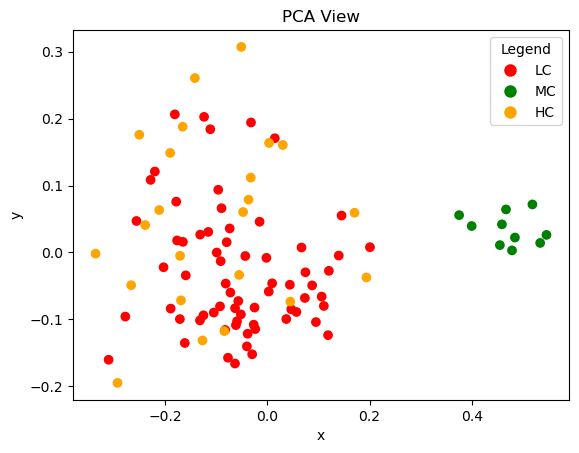

In [141]:
show_error_rf = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test_tic})
errors_name = show_error_rf[show_error_rf["Predict"] != show_error_rf["Real"]].index
errors_name

df_score_view_noqc = df_score_view.drop([0,1,2,3])

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 4
print("Gli errori vengono commessi sul campione: ",error_index.values)
colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3])
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

### Write on file

In [142]:
import json
file_path = "output_metaboloma_models.txt"
with open(file_path, "a") as file:
    json.dump(all_performance, file, indent=4)